In [1]:
import pandas as pd 
import numpy as np 
import seaborn as ssb 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\RD\\Desktop\\Diwali Sales Data.csv", encoding = "unicode_escape")

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,job,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu222,P00118542,female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,.//Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal/,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   job               11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# After analyz that no need of 'int64' integer in dataframe that is consume more space rather than 'int32' 
# I converte it into 'int32'. 

In [6]:
for i in df.columns:
    if df[i].dtype == "int64":
        df[i] = df[i].astype('int32') 
              

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int32  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int32  
 6   Marital_Status    11251 non-null  int32  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   job               11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int32  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int32(4), object(8)
memory usage: 1.1+ MB


In [7]:
# We ignored the Amount Column for change the dtype bcos it has null values .
# If we try performe dtype change operation over null values it will throw errors .

## Drop extra columns and rename column 

In [8]:
# use drop function 

df = df.drop(['Status','unnamed1'],axis = 1)

# remane job column name in occupation

df = df.rename(columns = {'job':'Occupation'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int32  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int32  
 6   Marital_Status    11251 non-null  int32  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int32  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int32(4), object(8)
memory usage: 967.0+ KB


In [9]:
# I use drop function and pass list of column to delete those (Status, unnamed1 ) from dataframe
# Now data look clean through looking info() function 

## Looking  for null values

In [10]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# find percentage of null value present in dataset

In [12]:
round(df.isnull().sum()/len(df)*100,2)

User_ID             0.00
Cust_name           0.00
Product_ID          0.00
Gender              0.00
Age Group           0.00
Age                 0.00
Marital_Status      0.00
State               0.00
Zone                0.00
Occupation          0.00
Product_Category    0.00
Orders              0.00
Amount              0.11
dtype: float64

In [13]:
# Found that .11% values are null in amount column of total values present .
# So there no need to impute values with mean/mode/median .
# if the percentage of null value 5% < null and null > 40% then it will be necessary to handle those values .

## Drop null values

In [14]:
df = df.dropna()
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
# now no null values present in dataset

## change amount dtype

In [16]:
# change data type
df['Amount'] = df['Amount'].astype('int32')
df['Amount'].dtypes

dtype('int32')

## Drop duplicate values

In [17]:
df.duplicated().sum()

8

In [18]:
df = df.drop_duplicates()

# Final check of duplicate values 
df.duplicated().sum()


0

In [19]:
# I used drop_duplicates method to remove duplicate value present in dataset .

## Unique values

In [20]:
df.nunique()

User_ID             3752
Cust_name           1252
Product_ID          2350
Gender                 4
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

In [21]:
# with observation I found four type of gender in Gender column . There is need to check gender column 

In [22]:
df['Gender'].unique()

array(['F', 'female', 'M', 'male'], dtype=object)

In [23]:
# Now there is need to replace female and male into F,M respectively .

## Replace values 

In [24]:

# In Gender column some rows contain "female" instide of "F"  and "male" instide of "M" .

df[df['Gender'].isin(['male','female'])]


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
2,1001990,Bindu222,P00118542,female,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
13,1001680,Vasudev,P00324942,male,26-35,26,1,Andhra Pradesh,Southern,Automobile,Auto,4,23718
39,1003111,Dean,P00249542,female,18-25,25,1,Andhra Pradesh,Southern,Banking,Auto,4,23252
40,1000687,Neola,P00156442,male,26-35,35,0,Kerala,Southern,Aviation,Auto,1,23247


In [25]:
# With the help of replace fuction we replace all male and female with M and F. 

df['Gender']=df['Gender'].replace({'male':'M','female':'F'})

df['Gender'].isin(['male','female']).sum()


0

## Use of strip function

In [26]:
# After looking Cust_name column found some extra space and unwanted number and alphabets with name .
# To remove them use strip method .

In [27]:
df['Cust_name'].head(10)

0     Sanskriti
1        Kartik
2      Bindu222
3        Sudevi
4          Joni
5          Joni
6       .//Balk
8       Kushal/
9         Ginny
10     Harshita
Name: Cust_name, dtype: object

In [28]:
ac = df['Cust_name'].str.strip('./123')

# Final check 

ac.head(10)

0     Sanskriti
1        Kartik
2         Bindu
3        Sudevi
4          Joni
5          Joni
6          Balk
8        Kushal
9         Ginny
10     Harshita
Name: Cust_name, dtype: object

# Exploratory Data Analysis

## Gender

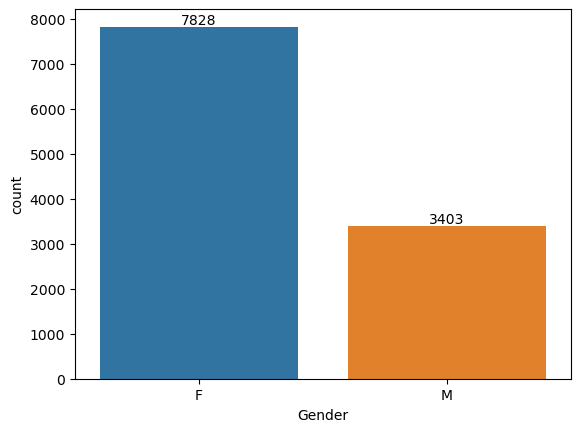

In [30]:
# plotting a bar chart for Gender and it's count

ax = ssb.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

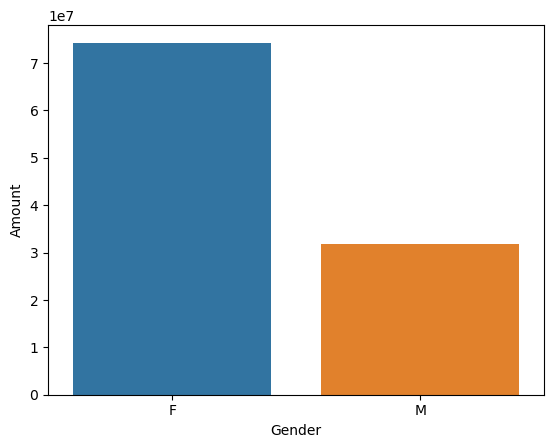

In [31]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ssb.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# Age

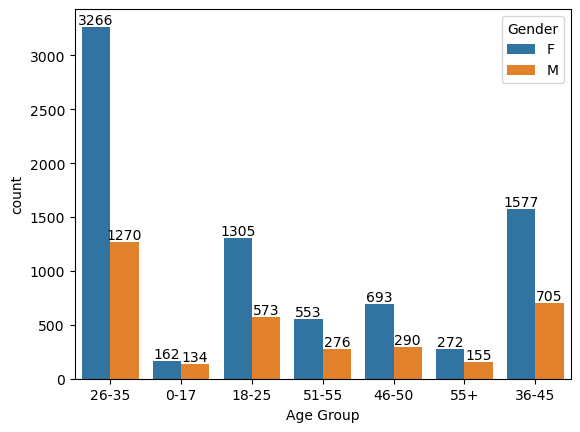

In [35]:
ax = ssb.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

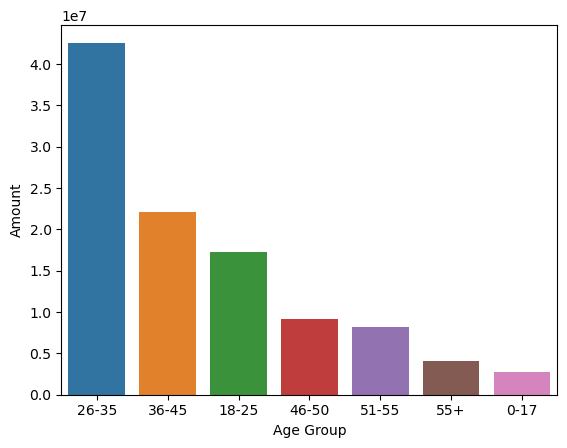

In [37]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ssb.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

# Store

<Axes: xlabel='State', ylabel='Orders'>

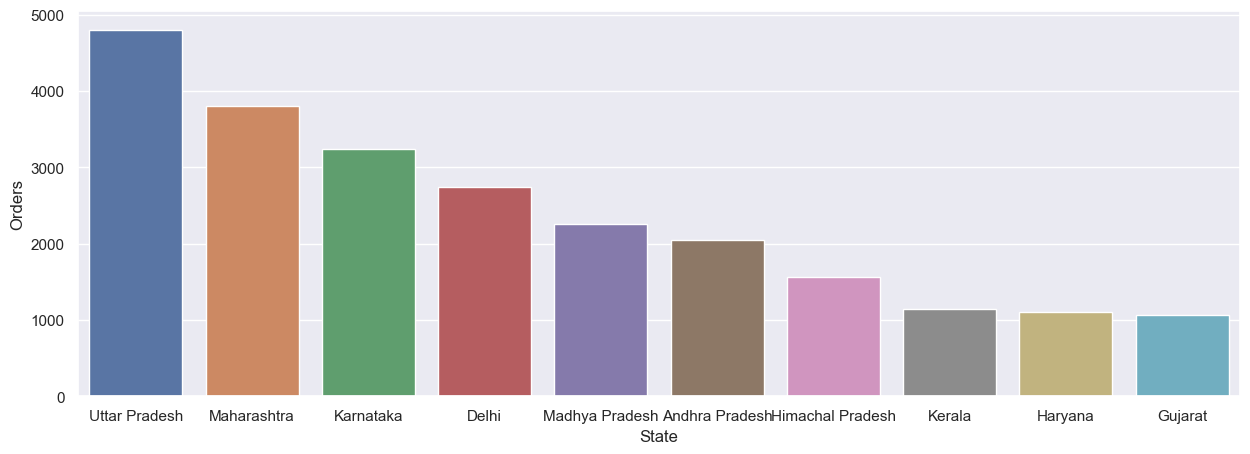

In [38]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

ssb.set(rc={'figure.figsize':(15,5)})
ssb.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

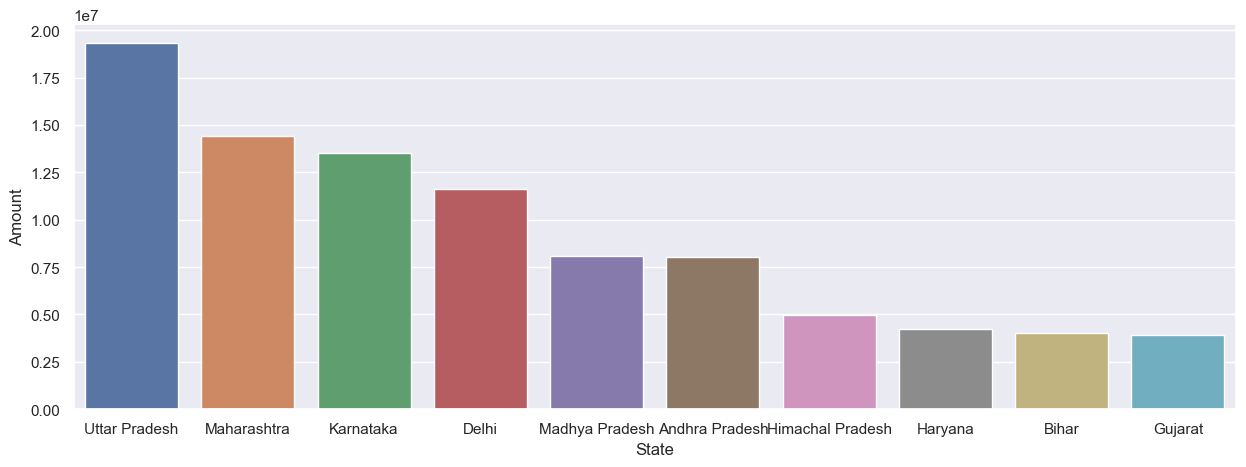

In [40]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

ssb.set(rc={'figure.figsize':(15,5)})
ssb.barplot(data = sales_state, x = 'State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# Marital Status

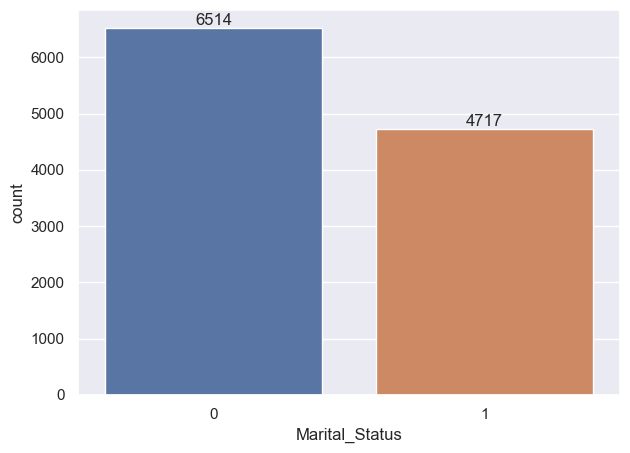

In [47]:
ax = ssb.countplot(data = df, x = 'Marital_Status')

ssb.set(rc={'figure.figsize':(7,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

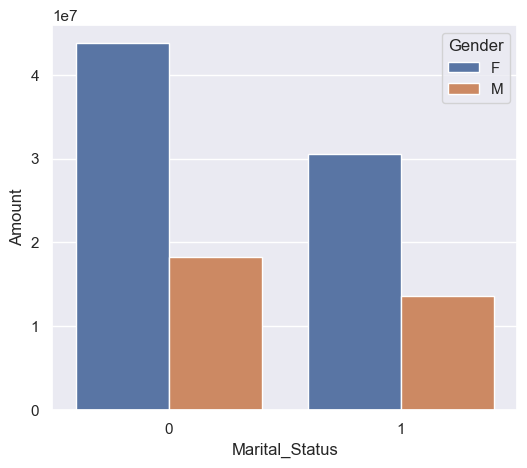

In [53]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ssb.set(rc={'figure.figsize':(6,5)})
ssb.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

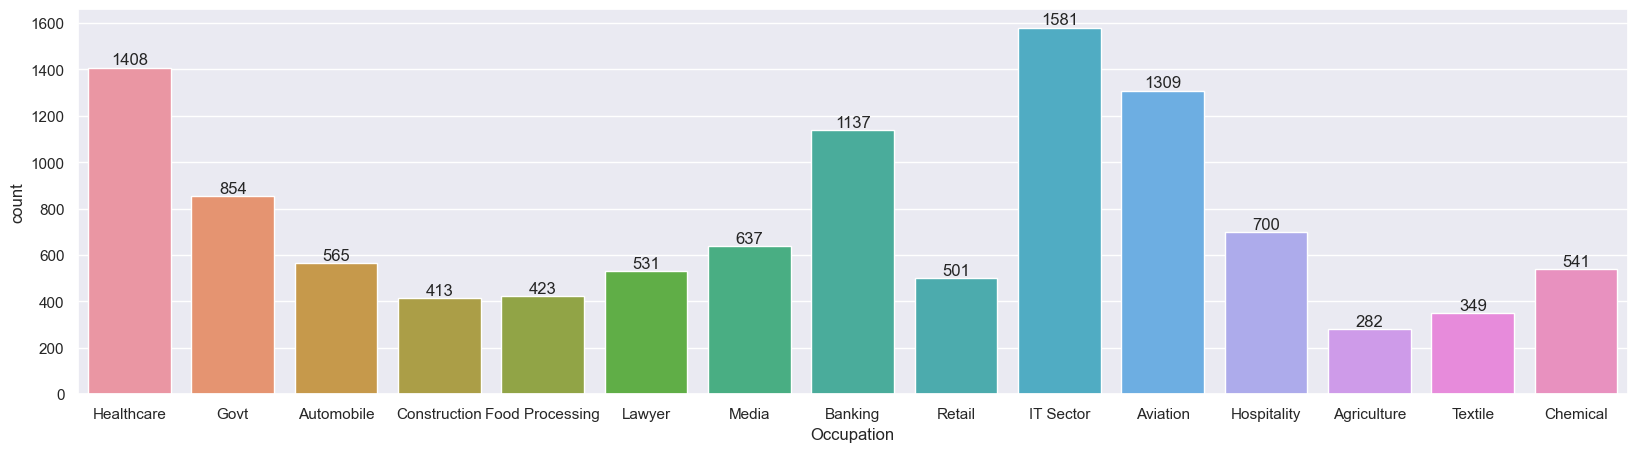

In [51]:
ssb.set(rc={'figure.figsize':(20,5)})
ax = ssb.countplot(data = df, x = 'Occupation
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

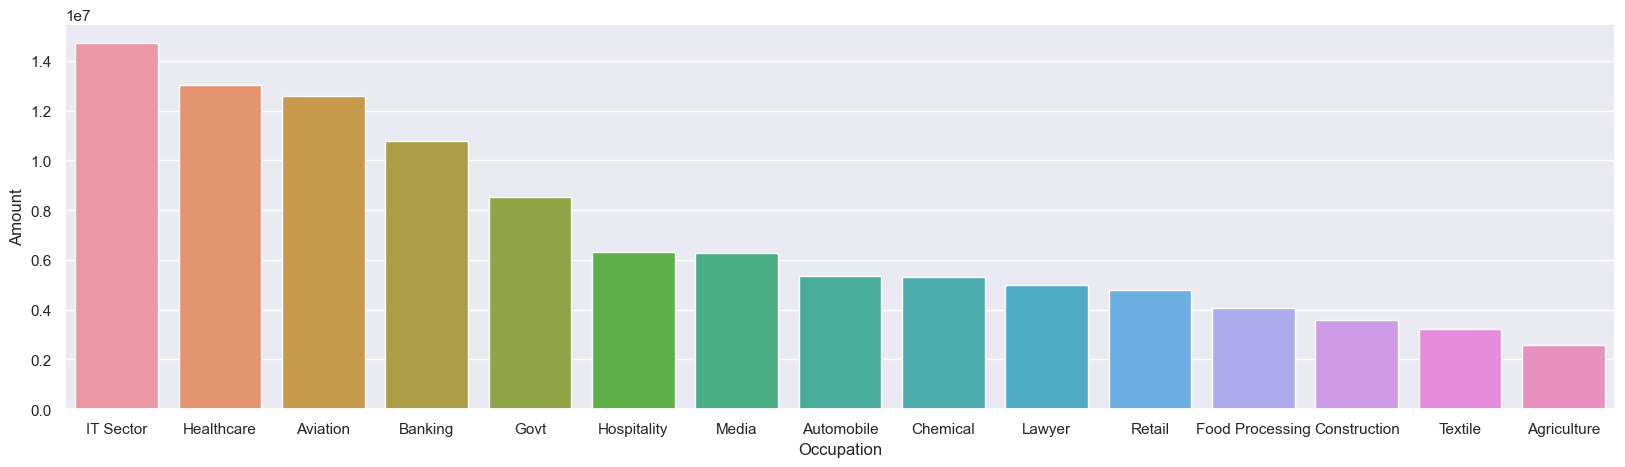

In [55]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ssb.set(rc={'figure.figsize':(20,5)})
ssb.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

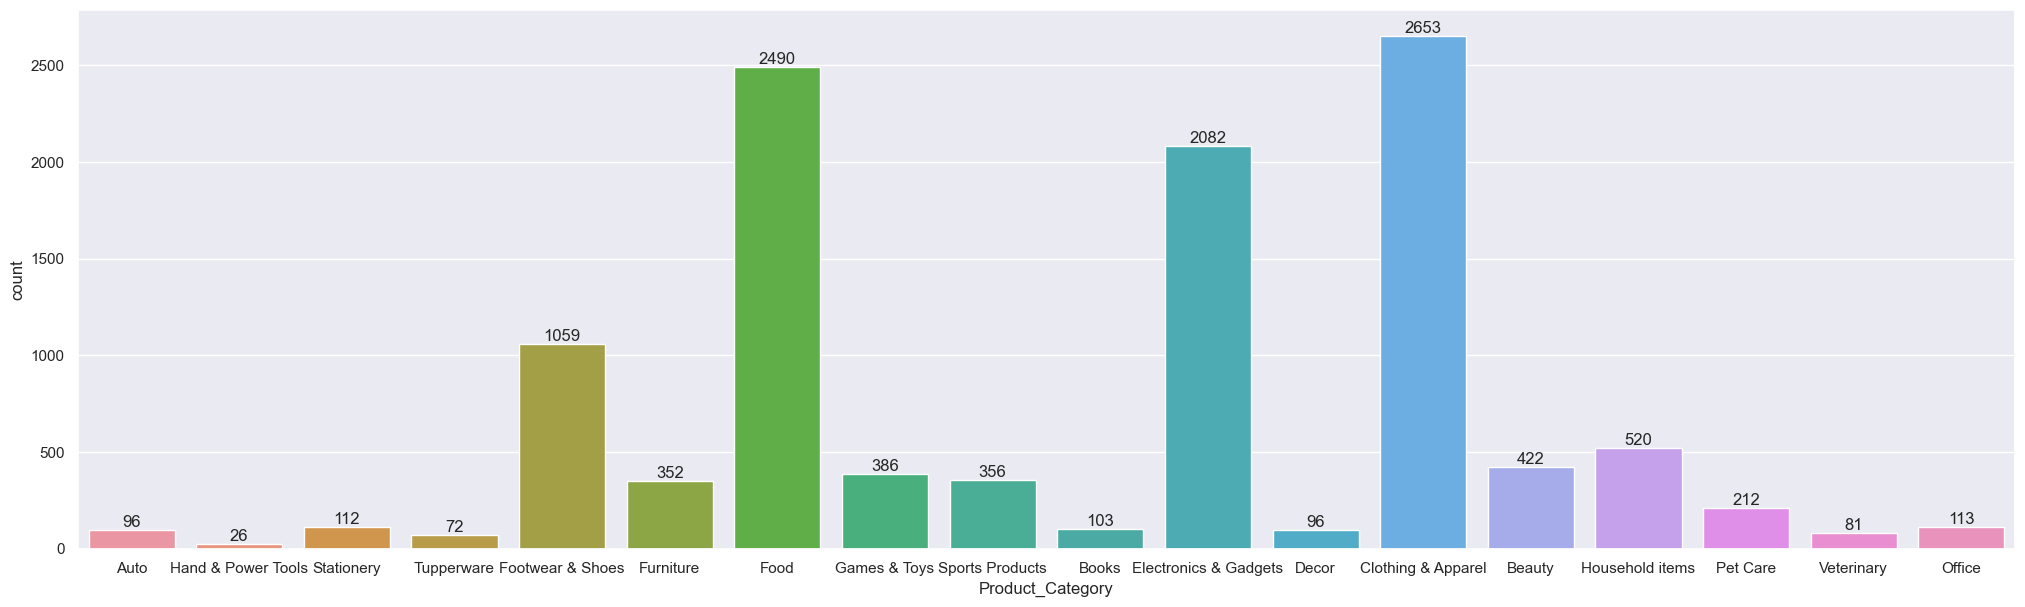

In [60]:
ssb.set(rc={'figure.figsize':(25,7)})
ax = ssb.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

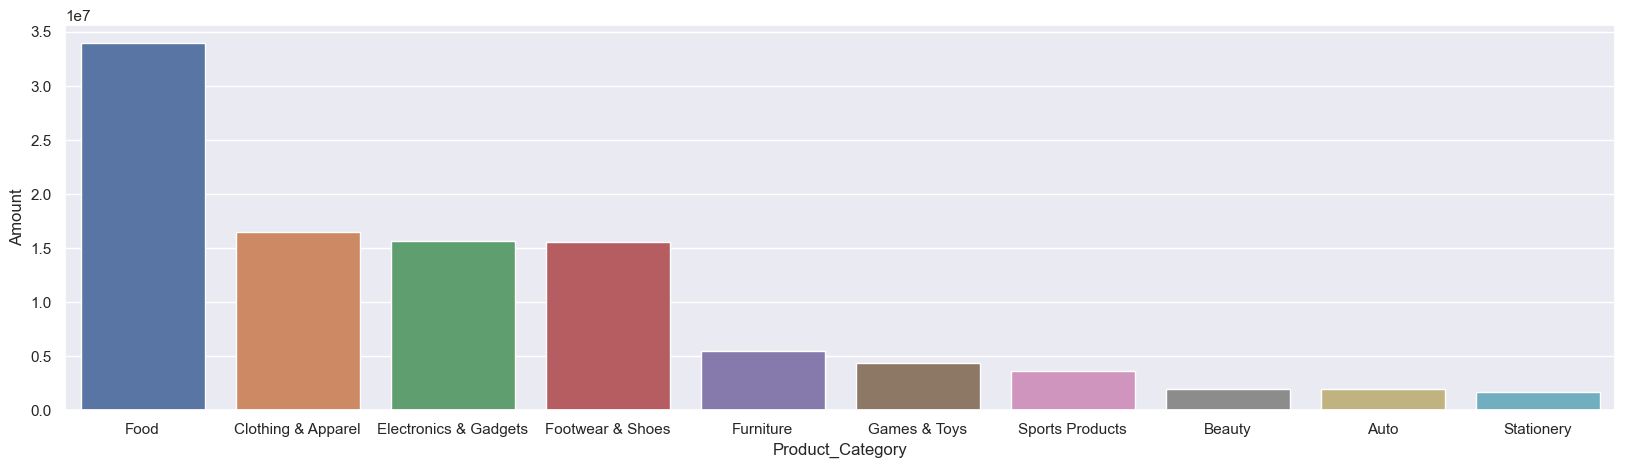

In [62]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

ssb.set(rc={'figure.figsize':(20,5)})
ssb.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

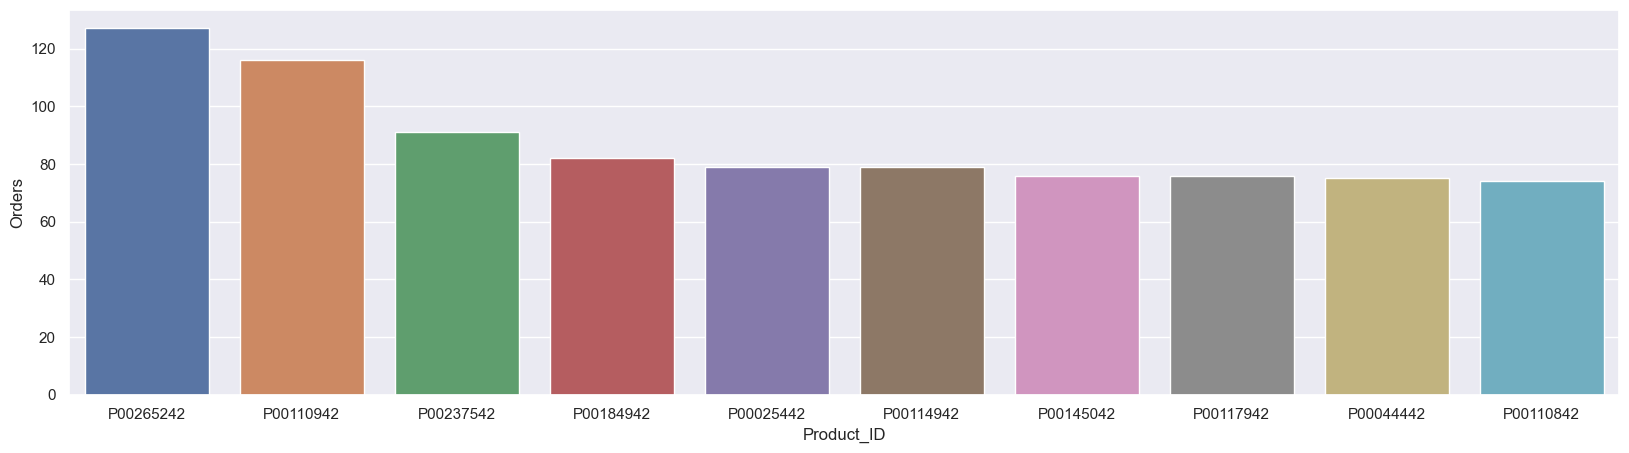

In [64]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

ssb.set(rc={'figure.figsize':(20,5)})
ssb.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

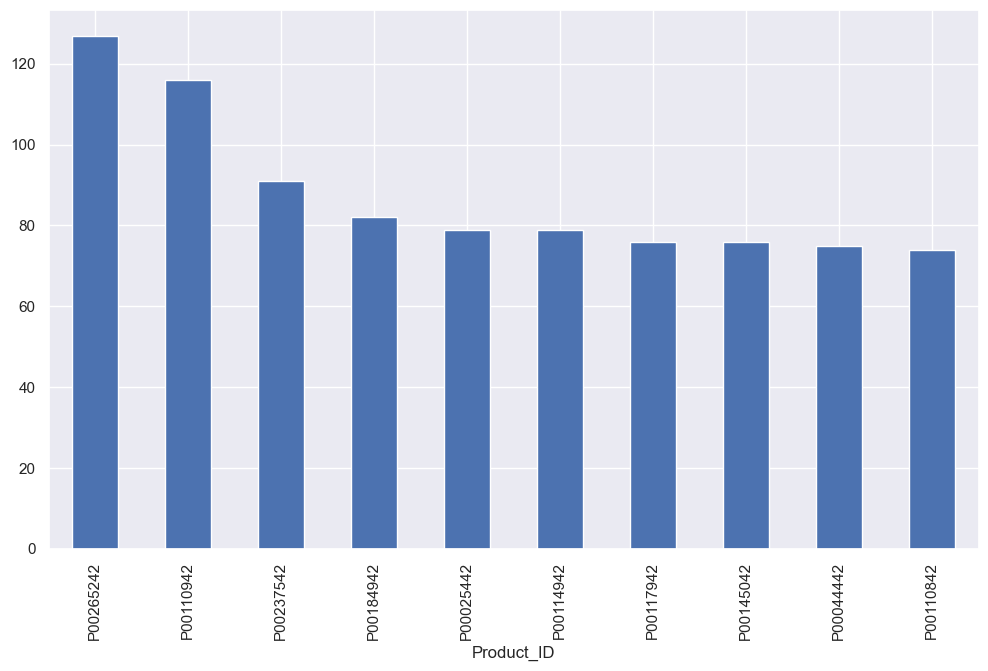

In [65]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion :

  1. Most revenue generated by married women of age group 26-35 yrs .
 
  2. Those womens are belong to UP, Maharastra and Karnataka .
 
  3. Those customers are working in IT, Healthcare and Aviation and they are more likely to buy products from Food, 
     Claothing and Electronics category .